# Bayesian Testing Solutions

First we will do our standard imports...

In [1]:
# Set up matplotlib to plot in this notebook
%matplotlib inline
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

# Make plots look nice
plt.style.use('ggplot')

### Question 1

You'll find some click-through data in the `data` folder. There are two files, one for each version of the site.
* the 0 refers to a visit without a conversion
* the 1 refers to a visit with a conversion.

Read in the data into python and store it in two arrays, one for each version of the site.

In [2]:
site_a = np.loadtxt('data/siteA.txt')
site_b = np.loadtxt('data/siteB.txt')

### Question 2

We'll start by dealing with only the Site A data. We'd like to visualize our understanding of the CTR as the data streams in. Let's start with the uniform prior. So before we get any data, we will say that every probability of 0 to 1 is equally likely. We would like to plot our distribution.

* To plot a continuous distribution, we need to make it discrete (since computers work that way). So we pick a large number of points to be our sample. In this case, take 100 points from 0 to 1 like this:

    ```python
    x = np.arange(0, 1.01, 0.01)
    ```

* Then use the `pdf` function for your distribution (which `scipy.stats` nicely has for us). In this case, since we're looking at the uniform distribution, we do the following.

    ```python
    y = scs.uniform.pdf(x)
    ```

* Now we can use `plt.plot` to plot the data. You can use this function to plot the distribution with it shaded in:

    ```python
    def plot_with_fill(x, y, label):
        lines = plt.plot(x, y, label=label, lw=2)
        plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())
    ```

    Give it the label "Prior".

* Do `plt.show()` to see the plot.

* Did your "Prior" label show up? You probably also need to add a `plt.legend()` call (before `plt.show`).

In [3]:
def plot_with_fill(x, y, label):
    lines = plt.plot(x, y, label=label, lw=2)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())
    plt.legend(loc='best')

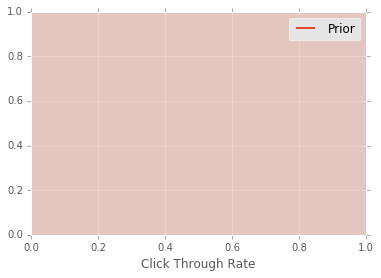

In [4]:
x = np.arange(0, 1.001, 0.001)
y_prior = scs.uniform().pdf(x)
plot_with_fill(x, y_prior, 'Prior')
plt.xlabel('Click Through Rate');

### Question 3

We will be using a *beta* distribution to represent the distribution of *pA* (the CTR for site A). 

First, modify the above to use the beta distribution instead of the uniform distribution to verify to yourself that with parameters `alpha=1` and `beta=1`, the beta distribution *is* the uniform distribution.

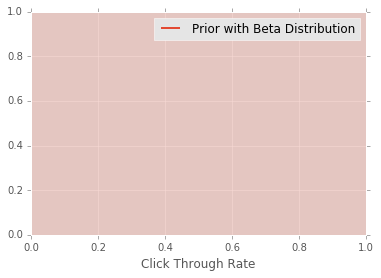

In [5]:
x = np.arange(0, 1.001, 0.001)
y_prior = scs.beta(a=1, b=1).pdf(x)

plot_with_fill(x, y_prior, 'Prior with Beta Distribution')
plt.xlabel('Click Through Rate');

As we can see, this is the exact same plot as using the uniform distribution above...

### Question 4

Consider the data of siteA for the first **50 views**. Draw a plot of the *posterior* after gathering this data. You should add the `alpha` parameter the number of conversions you've gotten. To the `beta` parameter, add the number of non-conversions you've gotten.

For this question, as well as other questions, let's define a function that let's us easily retrieve the `beta.pdf` of a given site.

In [6]:
def get_pdf(x, site):
    ''' The function will return the pdf for a given beta distribution

    Parameters
    -----------
    x : Array of x values
    site : Array cooresponding to the site in question

    Returns
    --------
    numpy array
    '''
    alpha = sum(site)
    beta = len(site) - alpha
    return scs.beta(a=alpha, b=beta).pdf(x)

In [7]:
y_50a = get_pdf(x, site_a[:50])

### Question 5

Overlay this new plot on top of the previous one.

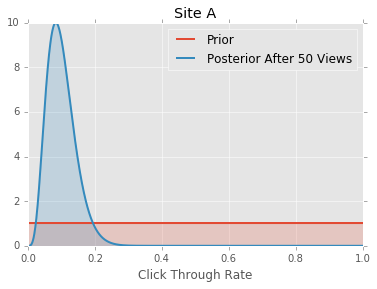

In [8]:
plot_with_fill(x, y_prior, 'Prior')
plot_with_fill(x, y_50a, 'Posterior After 50 Views')
plt.title('Site A')
plt.xlabel('Click Through Rate');

### Question 6

After 50 views, we're starting to hone in on our prediction of *pA*. Overlay on the same graph the posterior after 50 views, 100 views, 200 views, 400 views and finally all 800 views.

You should see as time progresses that we get more certain of the true value of *pA*.

In [9]:
# Let's do this all in one step to make graphing this more managable
views = [50, 100, 200, 400, 800]

# Create our y_a for each view count in views
y_a = [get_pdf(x, site_a[:view]) for view in views]

# Create the labels for passing to the plot_with_fill function
labels = ['Posterior After {} Views'.format(view) for view in views]

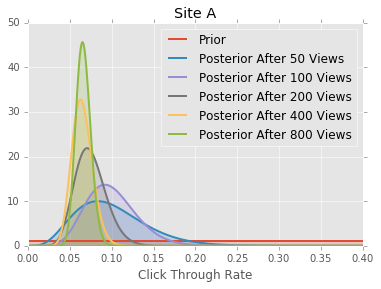

In [10]:
# Now let's actually plot all these at once
plot_with_fill(x, y_prior, 'Prior')
for y, label in zip(y_a, labels):
    plot_with_fill(x, y, label)
plt.title('Site A')
plt.xlabel('Click Through Rate')
plt.xlim([0, 0.4]);

### Question 7

Now we should understand how we're using the beta distribution to represent the distribution of the possible values of *pA*. Make a graph that has the final distributions for both *pA* and *pB* after all 800 views.

* You might want to use `plt.xlim` to change the limits of the x-axis so you can see the interesting part more clearly.

* You can see that the majority of the time site B is better than site A, but there is a chance that site A is better.

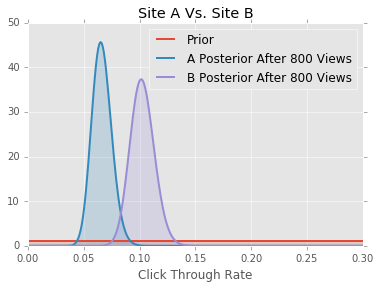

In [11]:
# First we want to determine y_a and y_b after 800 views
y_a = get_pdf(x, site_a[:800])
y_b = get_pdf(x, site_b[:800])

# Let's plot each
plot_with_fill(x, y_prior, 'Prior')
plot_with_fill(x, y_a, 'A Posterior After 800 Views')
plot_with_fill(x, y_b, 'B Posterior After 800 Views')

# Now let's zoom in on just the portion of the graph we are concerned with
plt.xlim(0, 0.3)
plt.title('Site A Vs. Site B')
plt.xlabel('Click Through Rate');

### Question 8

We now want to determine, given these distributions, what is the probability that site B is better than site A.

We do this with a simulation. Draw 10,000 points from site A's beta distribution and 10,000 points from site B's distribution. Use either `scs.beta.rvs` or `np.random.beta` for this. I prefer numpy's version since you can give it the number of samples in the `size` parameter.

You should get two arrays that look something like this:

```python
array([ 0.08609807,  0.05759121,  0.0581405 , ...,  0.07907663,
        0.09122627,  0.0606501 ])
```

This is simulating 10,000 times of drawing from our distributions. Count the number of times that what we drew from site B's distribution is larger than what we drew from site A's distribution. Divide by 10,000 to get the percent likelihood that site B is better than site A.

In [12]:
# First let's take 10000 draws for each like so...
a_sample = np.random.beta(a=sum(site_a), b=800-sum(site_a), size=10000)
b_sample = np.random.beta(a=sum(site_b), b=800-sum(site_b), size=10000)

# Now let's get the percentage of the time that the draw from Site B
# is larger than the draw from Site A
prob = (b_sample > a_sample).mean() * 100
print(
    'There is a {:.2f}% probability that Site B is better than Site A\n'.format(prob))

There is a 99.53% probability that Site B is better than Site A



A reasonable question might be why did we choose 10,000?  

The reason was simply that it was an arbitrarily large number of samples so we could get a good indication of the probability that Site B is better than Site A.  Changing this number to 100,000 or 1,000,000 should give an extremely similar result.

### Question 9

An X% credible interval in a posterior distribution is analogous to a frequentist analysis's confidence intervals. One method of determining a credible interval is the highest density interval (HDI), which is the most dense interval of a posterior distribution containing X% of its mass. Another method is the equal-tailed interval, which is the interval containing X% of the posterior distribution's mass where the probability of being below the interval is as likely as being above it.

Determine the 95% equal-tailed interval for site A's beta distribution using the simulations you just performed. (Hint: `SciPy.stats` has a percentile function called `ppf`.)

In [13]:
# We first need to calculate the lower bound using scs.beta.ppf function
lower_a = scs.beta(a=sum(site_a), b=800-sum(site_a)).ppf(0.025)
# Let's now do the same for the upper bound
upper_a = scs.beta(a=sum(site_a), b=800-sum(site_a)).ppf(0.975)
print("A's 95% HDI is {:.5f} to {:.5f}".format(lower_a, upper_a))

# Let's now do the same for Site B
lower_b = scs.beta(a=sum(site_b), b=800-sum(site_b)).ppf(0.025)
upper_b = scs.beta(a=sum(site_b), b=800-sum(site_b)).ppf(0.975)
print("B's 95% HDI is {:.5f} to {:.5f}\n".format(lower_b, upper_b))

A's 95% HDI is 0.05008 to 0.08447
B's 95% HDI is 0.08246 to 0.12442



### Question 10

A great thing about Bayesian A/B testing is that we can also answer the question, *What is the probability that site B is 2 percentage points better than site A*?

* Here, instead of needing `B > A`, we need `B > A + 0.02`.

* You should determine that we need more data to say this with confidence.

* Note, when you compare `B > A` you can calculate a single probability that this occurs in the simulation, but you can also do something richer, like calculate the entire distribution of `B - A`. Plot a histogram of this quantity. Try `B-A-.02`. What distribution do the shape of these histograms suggest? Why? What shape does it take on if you only use one observation of site_b's data? Is this a problem?

Let's first look at the first question in a similar manner to how we answered it before...

In [14]:
# Now let's get the percentage of the time that the draw from Site B is
# larger than the draw from Site A using the samples we defined earlier
prob = (b_sample > a_sample + 0.02).mean() * 100
print(
    'There is a {:.2f}% probability that Site B is 2% better than Site A\n'.format(prob))

There is a 87.83% probability that Site B is 2% better than Site A



Now this is a fairly high likelihood that Site B is 2% better than A, but this also completely depends on your tolerance for risk.  There is greater than a 1 in 10 chance that Site B **does not** perform 2% better than Site A.  To concretely make this conclusion we will need to collect more data.

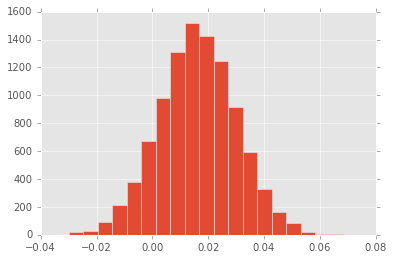

In [15]:
# Now let's take a look at the histogram of the difference b/w B and A + 2%
site_diff = b_sample - (a_sample + 0.02)
plt.hist(site_diff, bins=20);

### Question 11

For a sanity check, see that you get similar results as you did in #8 using the frequentist approach. Which of the questions in #10 could you answer with a frequentist approach?

$ H_0 $ = There is no difference in the CTR between site A and site B

$ H_A $ = Site B has a higher CTR than site A

Note that we divide the p-value returned by Scipy by 2 because by default it returns a p-value for a 2-tailed test and we are running a one-tail test

In [16]:
# Let's first look at the difference between Site A and B
print('Frequentist Comparison of Site A and B')
t, p = scs.ttest_ind(site_a, site_b)
if p/2 < 0.05:
    print("We can reject null hypothesis. P-value: {}\n".format(p/2))
else:
    print("We cannot reject null hypothesis. P-value: {}\n".format(p/2))

Frequentist Comparison of Site A and B
We can reject null hypothesis. P-value: 0.00453867262865



We would be able to answer the first question from #10 by adding 0.02 to every entry in the Site A results like so...

In [17]:
# Now let's look whether B is 2% better than A
print('Is Site B 2% better than Site A?')
t, p = scs.ttest_ind(site_a + 0.02, site_b)
if p/2 < 0.05:
    print("We can reject null hypothesis. P-value: {}\n".format(p/2))
else:
    print("We cannot reject null hypothesis. P-value: {}\n".format(p/2))

Is Site B 2% better than Site A?
We cannot reject null hypothesis. P-value: 0.120878828199



### Question 12 

It's important to understand the business impact of your work as a data scientist. Imagine that your company is debating whether to switch to site B from site A. Assume the following:

* the average click on site A yields $1.00 in profit 

* the average click on site B yields $1.05 in profit

Should your company invest in switching to site B? Assume it is costly to do so, both in time and money. Explain. (**Hint**: The answer is not obvious.)

In [18]:
# Let's first find the expected values of each site
expect_a = a_sample.mean()
expect_b = b_sample.mean()

In [19]:
def expected_profit_difference(hits, expect_a, expect_b):
    ''' Returns the expected profit from switching from A to B

    Parameters
    -----------
    hits : int number of clicks you expect your site to recieve
    expect_a : Expected value of Site A
    expect_b : Expected value of Site B

    Returns
    --------
    profit : float
    '''
    return expect_b * 1.05 * hits - expect_a * 1.00 * hits

In [20]:
# Let's look at a wide range of possible hits
hits = [10000 * 10**p for p in range(6)]
diffs = [expected_profit_difference(hit, expect_a, expect_b) for hit in hits]
for hit, diff in zip(hits, diffs):
    print("Expected difference of ${:.2f} for {} hits".format(diff, hit))

Expected difference of $413.20 for 10000 hits
Expected difference of $4131.98 for 100000 hits
Expected difference of $41319.79 for 1000000 hits
Expected difference of $413197.92 for 10000000 hits
Expected difference of $4131979.22 for 100000000 hits
Expected difference of $41319792.20 for 1000000000 hits


The answer to this question is entirely dependent on business circumstances including how much it costs to implement Site B and how many clicks you would expect it to recieve after implementation?

If it would cost a substantial amount of money to implement that change and you think that less than 1,000,000 people will click on it then it probably isn't worth the effort...